#### Advanced Evaluation Metrics
1. Confsuion Matrix
2. Precision
3. Recall
4. F1-Score
5. ROC and AUC Curve
6. Precision-Recall Curve
7. Regression Metrics (MAE, RMSE, R^2)

## Key Considerations for Metric Selection

### 1. Problem Type
- The first and most important decision.
- **Classification** → Accuracy, Precision, Recall, F1-score, ROC AUC, PR AUC  
- **Regression** → MAE, MSE, RMSE, R²

### 2. Class Imbalance (Classification)
- When one class is much rarer than others, **accuracy becomes misleading**.
- Example: 95% non-fraud, 5% fraud → model predicting all non-fraud gives 95% accuracy.
- Preferred metrics:
  - Precision
  - Recall
  - F1-Score
  - ROC AUC
  - PR AUC

### 3. Cost of Errors (Classification)

#### a) High Cost of False Positives (FP)
- FP = Predicting positive when it is actually negative.
- **Prioritize: Precision**
- Examples:
  - Spam detection
  - Content moderation

#### b) High Cost of False Negatives (FN)
- FN = Missing a positive case.
- **Prioritize: Recall**
- Examples:
  - Medical diagnosis
  - Fraud detection

#### c) Balanced Cost of FP and FN
- **Use: F1-Score**
- ROC AUC / PR AUC can also be considered for overall performance.

### 4. Business Objectives
- Metric choice depends on the end goal.
- Examples:
  - Maximize user engagement → Precision (recommendation systems)
  - Minimize risk → Recall (fraud, healthcare)
  - General balance → F1-Score or ROC AUC

### 5. Interpretability
- Some metrics are easier to explain to stakeholders.
- **Regression**:
  - MAE, RMSE → Interpretable in target variable units
- **Classification**:
  - Precision, Recall, F1-Score → Easy to understand
  - ROC AUC, PR AUC → More abstract but provide a global performance view

### 6. Data Characteristics (Regression)

#### a) Sensitivity to Outliers
- **MAE**:
  - Less sensitive to outliers
  - Preferred when extreme values should not dominate
- **RMSE**:
  - Penalizes large errors heavily
  - Useful when large errors are unacceptable

#### b) Proportion of Variance Explained
- **R² (R-squared)**:
  - Indicates how much variability in the target is explained by the model
  - Useful for understanding overall model fit


In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
                           n_classes=2, n_clusters_per_class=2, weights=[0.8, 0.2], flip_y=0.05, random_state=42)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

--- Confusion Matrix ---
True Negatives (TN): 232
False Positives (FP): 4
False Negatives (FN): 37
True Positives (TP): 27


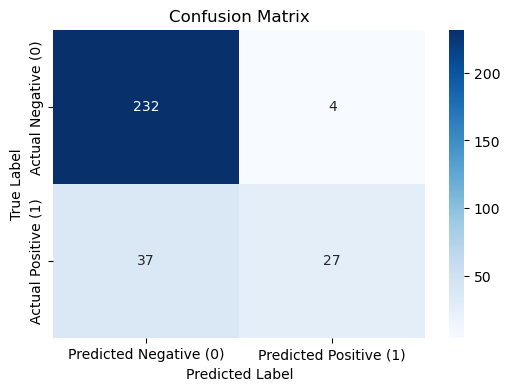

In [14]:
# --- Evaluation Metrics Calculation ---
# 1. Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
tn,fp,fn,tp=cm.ravel()

print("--- Confusion Matrix ---")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'], 
            yticklabels=['Actual Negative (0)', 'Actual Positive (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# 2. Precision, Recall, F1-Score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print("--- Classification Metrics ---")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

--- Classification Metrics ---
Precision: 0.8710
Recall: 0.4219
F1-Score: 0.5684


--- ROC Curve and AUC ---
AUC Score: 0.8587


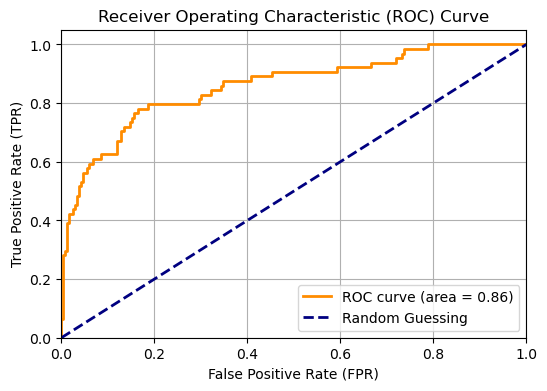

In [21]:
# 3. ROC and AUC Curve
fpr, tpr, threshold_roc = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"--- ROC Curve and AUC ---")
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


--- Precision-Recall Curve and AP ---
Area Under PR Curve (AP): 0.7068


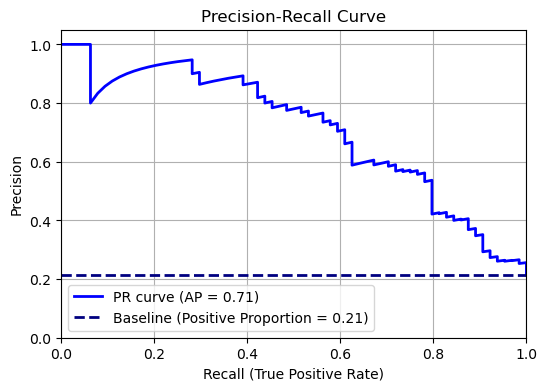

In [23]:
# 4. Precision-Recall Curve and AP
precision_pr, recall_pr, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
ap_score = auc(recall_pr, precision_pr) # Area under PR curve (Average Precision)

print(f"--- Precision-Recall Curve and AP ---")
print(f"Area Under PR Curve (AP): {ap_score:.4f}")

# Plot PR Curve
plt.figure(figsize=(6, 4))
plt.plot(recall_pr, precision_pr, color='blue', lw=2, label=f'PR curve (AP = {ap_score:.2f})')
positive_proportion = np.sum(y_test) / len(y_test)
plt.plot([0, 1], [positive_proportion, positive_proportion], color='navy', lw=2, linestyle='--', label=f'Baseline (Positive Proportion = {positive_proportion:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall (True Positive Rate)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [25]:
print("--- Overall Interpretation ---")
print(f"Model Performance Summary:")
print(f"- Confusion Matrix: Shows {tp} True Positives, {tn} True Negatives, {fp} False Positives, {fn} False Negatives.")
print(f"- Precision ({precision:.4f}): When the model predicts positive, it is correct {precision*100:.2f}% of the time.")
print(f"- Recall ({recall:.4f}): The model identifies {recall*100:.2f}% of all actual positive instances.")
print(f"- F1-Score ({f1:.4f}): A balanced measure of precision and recall.")
print(f"- ROC AUC ({auc_score:.4f}): The model's ability to distinguish between positive and negative classes across all thresholds is good.")
print(f"- PR AUC ({ap_score:.4f}): For this imbalanced dataset, the model performs moderately well in identifying positive instances, achieving an AP of {ap_score:.4f}.")

--- Overall Interpretation ---
Model Performance Summary:
- Confusion Matrix: Shows 27 True Positives, 232 True Negatives, 4 False Positives, 37 False Negatives.
- Precision (0.8710): When the model predicts positive, it is correct 87.10% of the time.
- Recall (0.4219): The model identifies 42.19% of all actual positive instances.
- F1-Score (0.5684): A balanced measure of precision and recall.
- ROC AUC (0.8587): The model's ability to distinguish between positive and negative classes across all thresholds is good.
- PR AUC (0.7068): For this imbalanced dataset, the model performs moderately well in identifying positive instances, achieving an AP of 0.7068.
